# PROJO personal
"""
Created on Friday Jan 06/01/2023

@author: Klaus
"""

In [1]:
#pip install plotly --upgrade

In [2]:
#conda install xlrd

In [3]:
#conda install conda=23.5.0

In [4]:
#pip install chart-studio

In [5]:
#pip install wordcloud

In [6]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import datetime
import plotly
#import plotly.plotly as py
from chart_studio.plotly import plotly as py
import plotly.graph_objs as go
from plotly import tools 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [7]:
 print(plotly.__version__)

5.9.0


In [8]:
#import plotly.io as pio
#pio.orca.config.update(plotly_domain='chart-studio.plotly.com')

In [9]:
#SET PLOTLY CREDENTIALS
#plotly.plotly.set_credentials_file(username='YOUR USERNAME', api_key='INSERT YOUR API KEY') OR
py.sign_in('USERNAME', 'INSERT YOUR API KEY')

In [10]:
# Reading in the files
shaz = pd.read_excel('C:/Users/Alex/OneDrive/Desktop/Klaus/old files/DALBERG PROJECTS/PROJO Personal/DATA/RAW/Excell chats/WhatsApp Chat with Shaz Kandie.xlsx')
#vee = pd.read_excel('E:/DALBERG PROJECTS/PROJO Personal/DATA/RAW/Excell chats/WhatsApp Chat with Vee.xlsx')
#vin = pd.read_excel('E:/DALBERG PROJECTS/PROJO Personal/DATA/RAW/Excell chats/WhatsApp Chat with Vin.xlsx')
#hannan = pd.read_excel('E:/DALBERG PROJECTS/PROJO Personal/DATA/RAW/Excell chats/WhatsApp Chat with Hannan.xlsx')

In [11]:
#Date_Time = datetime.datetime.combine(shaz.Date,shaz.Time)
shaz['Date_Time'] = [datetime.datetime.combine(*x) for x in zip(shaz['Date'],shaz['Time'])]

In [12]:
shaz.Date_Time 

0      2022-11-08 10:49:00
1      2022-11-08 10:50:00
2      2022-11-08 10:50:00
3      2022-11-08 11:08:00
4      2022-11-08 11:09:00
               ...        
1651   2022-12-17 19:14:00
1652   2022-12-18 18:03:00
1653   2022-12-18 18:09:00
1654   2022-12-19 19:41:00
1655   2022-12-20 09:31:00
Name: Date_Time, Length: 1656, dtype: datetime64[ns]

In [13]:
print(shaz.head())


        Date      Time          Name                                     Text  \
0 2022-11-08  10:49:00  Shaz Kandie:                   Anything baby unafanya   
1 2022-11-08  10:50:00  Shaz Kandie:  IMG-20221108-WA0009.jpg (file attached)   
2 2022-11-08  10:50:00  Shaz Kandie:  IMG-20221108-WA0008.jpg (file attached)   
3 2022-11-08  11:08:00   Alex Klaus:                  Izi umefanya tu sai...?   
4 2022-11-08  11:09:00   Alex Klaus:                      I missed you alot💯😁   

            Date_Time  
0 2022-11-08 10:49:00  
1 2022-11-08 10:50:00  
2 2022-11-08 10:50:00  
3 2022-11-08 11:08:00  
4 2022-11-08 11:09:00  


In [14]:
# removing media messages with not text content
shaz_no_media = shaz[shaz.Text != '<Media omitted>']

In [15]:
#Date = pd.to_datetime(shaz.Date)
# Convert the dates from strings to date objects
#Date = shaz.Date.apply(lambda x: datetime.date(*[int(i) for i in x.split('-')]))

In [16]:
# aux function to lable days of week
def label_daysofweek (row):
    if row['weekday'] == 0 :
        return 'Monday'
    if row['weekday'] == 1 :
        return 'Tuesday'
    if row['weekday'] == 2 :
        return 'Wednesday'
    if row['weekday'] == 3 :
        return 'Thursday'
    if row['weekday'] == 4 :
        return 'Friday'
    if row['weekday'] == 5 :
        return 'Saturday'
    if row['weekday'] == 6 :
        return 'Sunday'
    return



In [17]:
shaz['weekday'] = shaz['Date_Time'].apply(lambda x: x.weekday()) # list of the days of the week

In [18]:
# Brainstorming:
'''
- who messaged more in general?
- how does travel (together, separate) affects communication?
- what times of days do we usually chat in? 
- do we chat more on weekdays/weekends?
- who sends the first message in the monring more often?
- who initiates conversation in what percentage of the time, in general?
- whose response time is longer?

Content:
- exclude stopwords english
- which words does each of us use more often?
- which nicknames stand out?
- who is more positive and who is more negative? (lookup online)
- was any word used more often/less often with time?
- who sent more media?
- how many time did each say the word love, and when did it start?
'''

'\n- who messaged more in general?\n- how does travel (together, separate) affects communication?\n- what times of days do we usually chat in? \n- do we chat more on weekdays/weekends?\n- who sends the first message in the monring more often?\n- who initiates conversation in what percentage of the time, in general?\n- whose response time is longer?\n\nContent:\n- exclude stopwords english\n- which words does each of us use more often?\n- which nicknames stand out?\n- who is more positive and who is more negative? (lookup online)\n- was any word used more often/less often with time?\n- who sent more media?\n- how many time did each say the word love, and when did it start?\n'

In [19]:
### NUMBERS

## overall count of messages:
Alex = shaz[shaz.Name == 'Alex Klaus:'].Name.count()
Shaz = shaz[shaz.Name == 'Shaz Kandie:'].Name.count()
print('Shaz Kandie =',Shaz, 'and ','Alex Klaus =',Alex)

Shaz Kandie = 933 and  Alex Klaus = 723


In [20]:
shaz_timeline = shaz.groupby([shaz['Date_Time'].dt.date,'Name']).Text.count().reset_index()
Alex_std = np.std(shaz_timeline[shaz_timeline['Name']=='Alex Klaus:'].Text)
Shaz_std = np.std(shaz_timeline[shaz_timeline['Name']=='Shaz Kandie:'].Text)

In [21]:
## timeline of message sending by both:
traceA = go.Scatter(
        x = list(shaz_timeline[shaz_timeline['Name']=='Alex Klaus:'].Date_Time),
        y = list(shaz_timeline[shaz_timeline['Name']=='Alex Klaus:'].Text),
        mode = 'lines',
        name = 'by Klaus',
        marker = dict(
                color = 'rgb(221,46,107)'
                )
        )

traceS = go.Scatter(
        x = list(shaz_timeline[shaz_timeline['Name']=='Shaz Kandie:'].Date_Time),
        y = list(shaz_timeline[shaz_timeline['Name']=='Shaz Kandie:'].Text),
        mode = 'lines',
        name = 'by Shaz',
        marker = dict(
                color = 'rgb(0,102,153)'
                )
        )

data = [traceS, traceA]


In [22]:
# slider set up:
layout = dict(
    title='All Messages Ever Sent, Timeline',
    legend = dict(orientation="h"),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='analysis2-messaging-trends')


In [23]:
# grouping by sender and by date to sum daily count:
shaz_daily_counts = shaz.groupby([shaz['Date_Time'].dt.date,'Name']).Text.count().reset_index()

In [24]:
print(shaz_daily_counts)

     Date_Time          Name  Text
0   2022-11-08   Alex Klaus:    31
1   2022-11-08  Shaz Kandie:    33
2   2022-11-09   Alex Klaus:    28
3   2022-11-09  Shaz Kandie:    34
4   2022-11-10   Alex Klaus:    50
..         ...           ...   ...
68  2022-12-17   Alex Klaus:     1
69  2022-12-17  Shaz Kandie:     1
70  2022-12-18   Alex Klaus:     2
71  2022-12-19  Shaz Kandie:     1
72  2022-12-20   Alex Klaus:     1

[73 rows x 3 columns]


In [25]:
## weekday averages from each sender:
shaz_weekly = shaz.groupby(['Name',shaz['Date_Time'].dt.day,'weekday']).Text.count().reset_index()
shaz_weekly['weekday_w'] = shaz_weekly.apply(lambda row: label_daysofweek (row),axis=1)
shaz_weekly_avg = shaz_weekly.groupby(['weekday','Name']).Text.mean().reset_index()

shaz_weekly = shaz_weekly.sort_values(by='weekday')
shaz_weekly = shaz_weekly[shaz_weekly['Text']<700]

In [26]:
# plotting:
x = shaz_weekly[shaz_weekly['Name']=='Alex Klaus:'].weekday_w.tolist()
y_A= shaz_weekly[shaz_weekly['Name']=='Alex Klaus:'].Text.tolist()
y_S= shaz_weekly[shaz_weekly['Name']=='Shaz Kandie:'].Text.tolist()

trace_A = go.Box(
    y=y_A,
    x=shaz_weekly[shaz_weekly['Name']=='Alex Klaus:'].weekday_w.tolist(),
    name='by Klaus',
    marker = dict(
            color = 'rgb(221,46,107)',
            outliercolor = 'rgba(224, 35, 79, 0.6)',
            line = dict(
                outliercolor = 'rgba(224, 35, 79, 0.6)',
                outlierwidth = 2)),
)
    
trace_S = go.Box(
    y=y_S,
    x=shaz_weekly[shaz_weekly['Name']=='Shaz Kandie:'].weekday_w.tolist(),
    name='by Shaz',
    marker=dict(
        color = 'rgb(0,102,153)',
        outliercolor = 'rgba(0, 73, 153, 0.6)',
        line = dict(
                outliercolor = 'rgba(0, 73, 153, 0.6)',
                outlierwidth = 2)
        )
)
    
layout = go.Layout(
    title='Weekly Messages Breakdown',
    yaxis=dict(
        zeroline=False,
        title='Distinct Messages Sent'
    ),
    boxmode='group'
)

data = [trace_S, trace_A]    
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2,filename='analysis2-weekday-msgs')



In [27]:
## time of day analysis:
tot_days = max(shaz.Date_Time.dt.date)-min(shaz.Date_Time.dt.date)
shaz_time_day = shaz.groupby([shaz['Date_Time'].dt.hour,'Name']).Text.count().reset_index()
shaz_time_day['avg_mgs_hr'] = shaz_time_day.Text/1656


In [28]:
shaz_time_day

,Date_Time,Name,Text,avg_mgs_hr
0,0,Alex Klaus:,39,0.023551
1,0,Shaz Kandie:,54,0.032609
2,1,Alex Klaus:,22,0.013285
3,1,Shaz Kandie:,26,0.015700
4,2,Alex Klaus:,1,0.000604
5,5,Alex Klaus:,2,0.001208
6,5,Shaz Kandie:,19,0.011473
7,6,Alex Klaus:,23,0.013889
8,6,Shaz Kandie:,32,0.019324
9,7,Alex Klaus:,31,0.018720


In [29]:
#PLOTTING
A_daytime = np.array(shaz_time_day[shaz_time_day['Name']=='Alex Klaus:'].avg_mgs_hr)
S_daytime = np.array(shaz_time_day[shaz_time_day['Name']=='Shaz Kandie:'].avg_mgs_hr)

In [30]:
# Create an empty array with shape (21,1) 
c = np.empty((22, 1))

In [31]:
#Resize The array A_daytime to enable arithmetic with S_daytime
A= np.resize(A_daytime, (21,))

In [32]:
# plot the histogram based on the total counts; 
# on it plot the daily average
diff = S_daytime-A

trace1 = go.Bar(
    x=shaz_time_day[shaz_time_day['Name']=='Alex Klaus:'].Date_Time,
    y=shaz_time_day[shaz_time_day['Name']=='Alex Klaus:'].avg_mgs_hr,
    name='by Klaus',
    marker=dict(
        color = 'rgb(221,46,107)'
        )
)
trace2 = go.Bar(
    x=shaz_time_day[shaz_time_day['Name']=='Shaz Kandie:'].Date_Time,
    y=shaz_time_day[shaz_time_day['Name']=='Shaz Kandie:'].avg_mgs_hr,
    name='by Shaz',
    marker=dict(
        color='rgb(0,102,153)',
        )
)
trace3 = go.Bar(
    x=shaz_time_day[shaz_time_day['Name']=='Shaz Kandie:'].Date_Time,
    y=diff,
    name='difference',
    marker=dict(
        color='rgb(244,130,24)',
        )
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    title='Average Hourly Messages',
    xaxis = dict(title='Time of Day'),
    yaxis = dict(title='Average No. of Messages'),
    legend = dict(orientation="h"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='analysis2-avg-per-hour')


In [33]:
shaz_no_media

,Date,Time,Name,Text,Date_Time
0,2022-11-08,10:49:00,Shaz Kandie:,Anything baby unafanya,2022-11-08 10:49:00
1,2022-11-08,10:50:00,Shaz Kandie:,IMG-20221108-WA0009.jpg (file attached),2022-11-08 10:50:00
2,2022-11-08,10:50:00,Shaz Kandie:,IMG-20221108-WA0008.jpg (file attached),2022-11-08 10:50:00
3,2022-11-08,11:08:00,Alex Klaus:,Izi umefanya tu sai...?,2022-11-08 11:08:00
4,2022-11-08,11:09:00,Alex Klaus:,I missed you alot💯😁,2022-11-08 11:09:00
...,...,...,...,...,...
1651,2022-12-17,19:14:00,Alex Klaus:,Baby,2022-12-17 19:14:00
1652,2022-12-18,18:03:00,Alex Klaus:,https://hd.safa-24.com/,2022-12-18 18:03:00
1653,2022-12-18,18:09:00,Alex Klaus:,https://hd.safa-24.com/2022/12/2022_17.html,2022-12-18 18:09:00
1654,2022-12-19,19:41:00,Shaz Kandie:,Baby,2022-12-19 19:41:00


In [34]:
# looking at the differences in time
## whos the initiator?
# find the first messages of each day (after 6am)
# removing anything before 6am:
shaz_6_am = shaz_no_media[shaz_no_media['Date_Time'].dt.hour > 5]


In [35]:
A_daytime

array([0.02355072, 0.01328502, 0.00060386, 0.00120773, 0.01388889,
       0.01871981, 0.03925121, 0.01268116, 0.00785024, 0.01570048,
       0.02657005, 0.02355072, 0.03200483, 0.03683575, 0.01690821,
       0.01570048, 0.01449275, 0.02596618, 0.03683575, 0.02173913,
       0.01811594, 0.02113527])

In [36]:
S_daytime

array([0.0326087 , 0.01570048, 0.01147343, 0.01932367, 0.01992754,
       0.04408213, 0.01690821, 0.01630435, 0.01871981, 0.02113527,
       0.03864734, 0.03804348, 0.04347826, 0.01388889, 0.01449275,
       0.01932367, 0.03019324, 0.03925121, 0.02777778, 0.03985507,
       0.04227053])

In [37]:
# finding the first messages of each day:
shaz_firsts = shaz_6_am.groupby(shaz['Date_Time'].dt.date).apply(lambda x: x.iloc[[0]])


In [38]:
# plotting:
#1 plot the count of first messages (separate curve pp), group by hour of day, show the timeline
shaz_firsts = shaz_firsts.rename(index=str, columns={"Date_Time": "time1"}).reset_index()
shaz_firsts['hour'] = shaz_firsts.time1.dt.hour
#shaz_firsts = shaz_firsts.groupby([shaz_firsts['time1'].dt.hour,'sender']).count()
#shaz_firsts = shaz_firsts.drop(columns=['Date_Time','time1']).reset_index()

In [39]:

trace1 = go.Histogram(
    x=shaz_firsts[shaz_firsts.Name=='Alex Klaus:'].hour,
    name='by Klaus',
    opacity=0.75,
    xbins=dict(
        start=6.0,
        end=24.0,
        size=1
    ),
    marker=dict(
        color='rgb(221,46,107)',
        )
)
trace2 = go.Histogram(
    x=shaz_firsts[shaz_firsts.Name=='Shaz Kandie:'].hour,
    name='by Shaz',
    opacity=0.75,
    xbins=dict(
        start=6.0,
        end=24.0,
        size=1
    ),
    marker=dict(
        color='rgb(0,102,153)',
        )
)

data = [trace2, trace1]
layout = go.Layout(
        barmode='overlay',
        title='First Messages of the Day',
        xaxis = dict(title='Time of Day'),
        yaxis = dict(title = 'Distinct Messages'),
        legend = dict(orientation="h"),
    )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='analysis2-first-msg-dist')



In [40]:
# 1.5 plotting number of initiations each month (sum on hour, in group by month)
shaz_firsts.Date_Time = pd.to_datetime(shaz_firsts['Date_Time'])
shaz_timeline_init = shaz_firsts.groupby(['Name', shaz_firsts.Date_Time.dt.year, shaz_firsts.time1.dt.month,'Text']).sum().reset_index()
from datetime import datetime
shaz_timeline_init['Date'] = shaz_timeline_init.apply(lambda row: datetime(row['Date_Time'], row['time1'], 1), axis=1)


C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\3565260364.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [41]:
shaz_timeline_init

,Name,Date_Time,time1,Text,hour,Date
0,Alex Klaus:,2022,11,Heeey,13,2022-11-01
1,Alex Klaus:,2022,11,"Heeey, morning...",6,2022-11-01
2,Alex Klaus:,2022,11,Heeey...,11,2022-11-01
3,Alex Klaus:,2022,11,I'm up... thanks baby 💯😁,6,2022-11-01
4,Alex Klaus:,2022,11,Morning baby girl,7,2022-11-01
5,Alex Klaus:,2022,12,Heey,9,2022-12-01
6,Alex Klaus:,2022,12,IMG-20221210-WA0003.jpg (file attached),12,2022-12-01
7,Alex Klaus:,2022,12,Morning baby girl...,6,2022-12-01
8,Alex Klaus:,2022,12,Morning...,6,2022-12-01
9,Alex Klaus:,2022,12,When was this..? Sijai kuona na iyo dress pia🤷...,6,2022-12-01


In [42]:
Alex_Text = shaz_timeline_init[shaz_timeline_init.Name == 'Alex Klaus:'].Text.count()
Shaz_Text = shaz_timeline_init[shaz_timeline_init.Name == 'Shaz Kandie:'].Text.count()
print('Alex text count is ',Alex_Text,' and ','Shaz text count is ',Shaz_Text)

Alex text count is  12  and  Shaz text count is  19


In [43]:
traceG1 = go.Scatter(
        x = list(shaz_timeline_init[shaz_timeline_init['Name']=='Alex Klaus:'].Date),
        y = list(shaz_timeline_init[shaz_timeline_init['Name']=='Alex Klaus:'].hour),
        mode = 'lines',
        name = 'by Klaus',
        marker = dict(
                color = 'rgb(221,46,107)'
                )
        )

traceO1 = go.Scatter(
        x = list(shaz_timeline_init[shaz_timeline_init['Name']=='Shaz Kandie:'].Date),
        y = list(shaz_timeline_init[shaz_timeline_init['Name']=='Shaz Kandie:'].hour),
        mode = 'lines',
        name = 'by Shaz',
        marker = dict(
                color = 'rgb(0,102,153)'
                )
        )

data = [traceO1, traceG1]
layout = go.Layout(
        title='Initiative Throughout Time',
        xaxis = dict(title = 'Month and Year'),
        yaxis = dict(title = 'Count of days of initiated conversation'),
        legend = dict(orientation="h"),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='analysis2-initiative-trends')


In [44]:
# cleaning stop words from relevant df:
shaz_firsts["Text"] = shaz_firsts["Text"].str.lower().str.split()

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
stop_words_swahili  = ["hata", "kama", "na", "kwa", "kutoka", "kuwa", "sana", "hivyo", "mimi", "yako", "wengine", "hivi", "kwa", "kwamba", "kwenda", "kutokea", "kutwa", "kuja", "ya", "kwenye", "ambayo", "lakini", "kila", "hii", "haya", "sio", "kweli", "nini", "basi", "bila", "kutokana", "mara", "muda", "mwezi", "ndani", "ni", "pamoja", "pia", "sana", "tangu", "vile", "vipi", "wao", "watu", "wengine", "wiki", "wote"]
shs = ['wamlambez','baby','heeey', 'jana usiku', 'tafala', 'nini', 'gwara', 'majezi', 'bibi', 'mwizi', 'mafisi', 'vibaya', 'tamu', 'kwaheri', 'wivu', 'tupu', 'chali', 'staki', 'mchongoano', 'tulizana', 'sisi', 'hii', 'mchezo', 'kuja', 'juu', 'unajua', 'tumbo', 'kamili', 'wacha', 'kikombe', 'cheza', 'choma', 'makofi', 'kula', 'kiasi', 'hakuna', 'hapa', 'sawa', 'sana', 'macho', 'safi', 'bado', 'mzito']
stop = stopwords.words('english')
stop.extend(stop_words_swahili+shs)

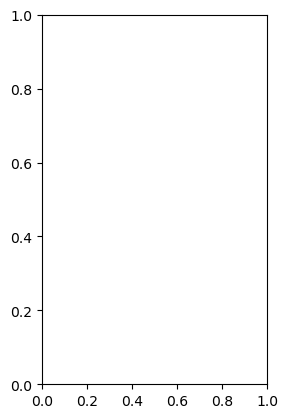

In [47]:
ax1 = plt.subplot(121)

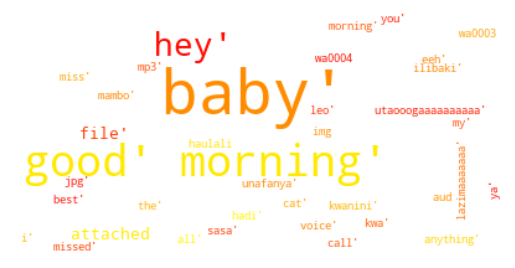

In [48]:
# creating word cloud for Shaz:
text_shaz = shaz_firsts[shaz_firsts.Name=='Shaz Kandie:']['Text']
text_shaz = ' '.join([str(item) for item in text_shaz])
wordcloud_shaz = WordCloud(colormap='autumn',relative_scaling = 0.69, stopwords = stop, max_font_size=50,background_color="white").generate(text_shaz)

plt.imshow(wordcloud_shaz, interpolation='bilinear')
ax1.set_title('Shaz First Messages')
plt.axis("off")
plt.show()

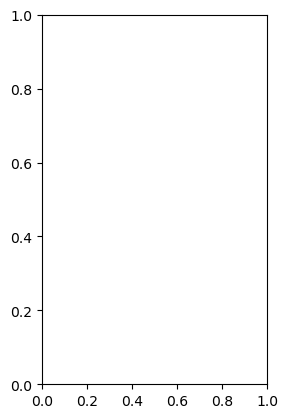

In [49]:
ax2 = plt.subplot(122)

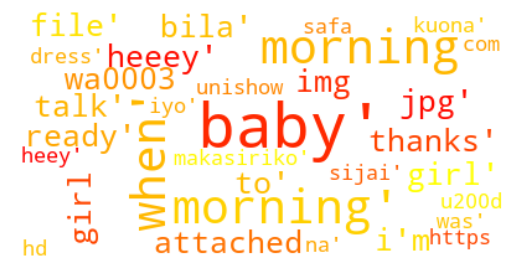

In [50]:
# for Klaus:
text_klaus = shaz_firsts[shaz_firsts.Name=='Alex Klaus:']['Text']
text_klaus = ' '.join([str(item) for item in text_klaus])
wordcloud_klaus = WordCloud(colormap='autumn',relative_scaling = 0.69, stopwords = stop, max_font_size=50,background_color="white").generate(text_klaus)

plt.imshow(wordcloud_klaus, interpolation='bilinear')
ax2.set_title('Klaus First Messages')
plt.axis("off")
plt.show()

In [51]:
## time delay analysis
#shaz_delay = pd.concat([shaz, shaz_delay])
shaz_delay = pd.DataFrame(columns = shaz.columns)
shaz_delay = pd.concat([shaz_delay, shaz], ignore_index = True)

In [52]:
# filling in a new df with only non-consecutive messages
for i in range(0, shaz.shape[0]-1):
    if shaz.iloc[i].Name != shaz.iloc[i+1].Name:
        shaz_delay = shaz_delay.append(shaz.iloc[i])
    #print(i)


C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1566039972.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1566039972.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1566039972.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1566039972.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1566039972.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [53]:
# extracting time differences between all messages:
shaz_delay['diff_dt'] = shaz_delay.Date_Time.diff()
shaz_delay.drop(shaz_delay.index[0], inplace = True)
shaz_delay['diff_m'] = shaz_delay['diff_dt'].dt.total_seconds().div(60).astype(int)

In [54]:
# keeping only gaps between 0 and 3 hours
shaz_delay = shaz_delay[shaz_delay.diff_m < 180]
shaz_delay = shaz_delay[shaz_delay.diff_m >= 0]


In [55]:
# adding day of week:
shaz_delay['day'] = shaz_delay.apply (lambda row: label_daysofweek (row),axis=1)


In [56]:
# plotting: violin chart of us one side by side
x = shaz_delay['day'].tolist()

In [57]:
#y_shaz = shaz_delay[shaz_delay['Name']=='Shaz Kandie:'].diff_m.tolist()
#y_Klaus = shaz_delay[shaz_delay['Name']=='Alex Klaus:'].diff_m.tolist()


In [58]:
import plotly.figure_factory as ff
# FIRST OPTION DISTPLOTS

x_Klaus = shaz_delay[shaz_delay['Name']=='Alex Klaus:'].diff_m
x_Shaz = shaz_delay[shaz_delay['Name']=='Shaz Kandie:'].diff_m

hist_data = [x_Klaus, x_Shaz]
group_labels = ['by Klaus', 'by Shaz']

colors = ['rgb(221,46,107)', 'rgb(0,102,153)']
fig = ff.create_distplot(
    hist_data, group_labels, bin_size=2,colors=colors, show_rug=False
    )
fig['layout'].update(title='Reply Delay Distribution',xaxis=dict(title='Delay [minutes]'))
py.iplot(fig,filename='analysis2-msg-delay-dist')


In [59]:
# SECOND OPTION: HISTOGRAM
trace1 = go.Histogram(
    x=shaz_delay[shaz_delay['Name']=='Alex Klaus:'].diff_m,
    name='by Klaus',
    opacity=0.5,
    xbins=dict(
        start=0.0,
        end=180.0,
        size=2
    ),
    marker=dict(
            color = 'rgb(221,46,107)'
        )
)
trace2 = go.Histogram(
        x=shaz_delay[shaz_delay['Name']=='Shaz Kandie:'].diff_m,
        name='by Shaz',
        opacity=0.5,
        xbins=dict(
                start=0.0,
                end=180.0,
                size=2
    ),
    marker=dict(
        color='rgb(0,102,153)',
        )
)

data = [trace1, trace2]
layout = go.Layout(
        barmode='overlay',
        title='Messages Reply Delay (minutes)',
        xaxis = dict(
                title= 'Delay [minutes]'
                ),
        legend = dict(orientation="h"),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='analysis2-msg-delay-hist')


In [60]:
# 2 average daytime delay
shaz_delay['init_time'] = shaz_delay.Date_Time-shaz_delay.diff_dt
shaz_delay['init_time'] = shaz_delay['init_time'].dt.hour
shaz_av_delay = shaz_delay.groupby(['init_time', 'Name','day']).mean().reset_index()

shaz_av_delay_wkday = shaz_av_delay.groupby(['Name','day']).mean()

shaz_av_delay_hour = shaz_av_delay.groupby(['Name','init_time']).mean().reset_index()


C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1421789459.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Alex\AppData\Local\Temp\ipykernel_12440\1421789459.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [61]:
# let's bin the delays to be able to do a heatmap:
bins = [0, 2, 5, 10, 30, 60, 120, 180]
labels = ['0-2','2-5','5-10','10-30','30-60','60-120','120-180']

shaz_delay['binned'] = pd.cut(shaz_delay['diff_m'], bins=bins, labels=labels)
shaz_delay_binned = shaz_delay.groupby(['binned','init_time', 'Name']).count().reset_index()
#Delay Heatmap replies by Klaus
dataGT = [
    go.Heatmap(
        z=shaz_delay_binned[shaz_delay_binned['Name']=='Alex Klaus:'].Text,
        x=shaz_delay_binned[shaz_delay_binned['Name']=='Alex Klaus:'].init_time,
        y=shaz_delay_binned[shaz_delay_binned['Name']=='Alex Klaus:'].binned,
        colorscale='Cividis',
    )
]

layoutGT = go.Layout(
    title='Delay Heatmap, replies by Klaus',
    xaxis = dict(ticks='', nticks=25, title='Time of day [hr]'),
    yaxis = dict(ticks='', title='Delay [minutes]' )
)

fig = go.Figure(data=dataGT, layout=layoutGT)
py.iplot(fig, filename='analysis2-heatmap-delays-klaus')


In [62]:
#Delay Heatmap replies by Shaz
dataOJ = [
    go.Heatmap(
        z=shaz_delay_binned[shaz_delay_binned['Name']=='Shaz Kandie:'].Text,
        x=shaz_delay_binned[shaz_delay_binned['Name']=='Shaz Kandie:'].init_time,
        y=shaz_delay_binned[shaz_delay_binned['Name']=='Shaz Kandie:'].binned,
        colorscale='Cividis',
    )
]

layoutOJ = go.Layout(
    title='Delay Heatmap, replies by Shaz',
    xaxis = dict(ticks='', nticks=25, title='Time of day [hr]'),
    yaxis = dict(ticks='', title='Delay [minutes]' )
)

fig = go.Figure(data=dataOJ, layout=layoutOJ)
py.iplot(fig, filename='analysis2-heatmap-delays-shaz')


# Machine learning model

In [63]:
#Pre Processing data
#Step 1 convert to lower text
lower_shaz = []
def to_lower_case(data):
    for words in shaz.Text:
        lower_shaz.append(str.lower(words))


In [64]:
#shaz['Text_lower'] = shaz['Text'].str.lower()

In [65]:
to_lower_case(shaz)

In [66]:
shaz['Text_lower'] =lower_shaz
type(lower_shaz)

list

In [67]:
#step 2 Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
#nltk.download('punkt') #commented cuz [nltk_data]   Package punkt is already up-to-date!

In [68]:
#split dialogue into sentences using SENT_TOKENIZE
#sentences = sent_tokenize(lower_shaz)
lower_shaz_tokenized = []
for item in lower_shaz:
    lower_shaz_tokenized.extend(sent_tokenize(item))
    

In [69]:
lower_shaz_tokenized

['anything baby unafanya',
 'img-20221108-wa0009.jpg (file attached)',
 'img-20221108-wa0008.jpg (file attached)',
 'izi umefanya tu sai...?',
 'i missed you alot💯😁',
 'umefanya retouching juzi..?',
 'ni ile tulifanya jana bt nilicorrect tu,,,',
 'baby sijekula breakfast,,,niko njaa wueh,,,nadai kuishia kwa nyumba hadi',
 'ziii ni since ile day,,ni ile nimezifungua tu',
 'i miss you too baby',
 'you deleted this message',
 'you should go ama ukikam ndo utaenda .',
 '?',
 "ooooh, but you've tried kufanya that fast 💯",
 'kwani hosi hawana chai ama walikula ngombe🤷\u200d♂️����😂😂',
 'yeah huku sioni place maybe ule plug wangu was voi🤣',
 'yeah for real nimetoka hapo nikahisi njaa sasa vizuri',
 'leo wako wote present banah',
 'anyway nisharudi home baby',
 '😂😂😂😂 waaaah sawa',
 'skuizi si uko njaa🤷\u200d♂️😂😂😂',
 'kwani nyinyi hupewa chai ya watu hawayuko🤷\u200d♂️���😂😂😂',
 'aight... ushakula sasa...',
 'wueh wacha tu ,,bt nimefika nikadishy  uji🤦\u200d♀️',
 'banah,,,kama hawako ndo inakuanga

In [70]:
shaz['Text_lower_clean']=''

In [72]:
import re

In [73]:
# Loop over the rows   
for index, row in shaz.iterrows():
    Text_lower_clean = re.sub('[^a-zA-Z\s]', '', row['Text_lower'])
    shaz.at[index, 'Text_lower_clean'] = Text_lower_clean   

In [74]:
# Cleaning the column using the apply function
shaz['Text_lower_clean'] = shaz['Text_lower'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

In [75]:
Text_lower_clean
print(shaz.Text_lower_clean)

0       anything baby unafanya
1       imgwajpg file attached
2       imgwajpg file attached
3          izi umefanya tu sai
4            i missed you alot
                 ...          
1651                      baby
1652            httpshdsafacom
1653        httpshdsafacomhtml
1654                      baby
1655                      heey
Name: Text_lower_clean, Length: 1656, dtype: object


In [76]:
clean_text_1 = shaz.Text_lower_clean

In [77]:
clean_text_1

0       anything baby unafanya
1       imgwajpg file attached
2       imgwajpg file attached
3          izi umefanya tu sai
4            i missed you alot
                 ...          
1651                      baby
1652            httpshdsafacom
1653        httpshdsafacomhtml
1654                      baby
1655                      heey
Name: Text_lower_clean, Length: 1656, dtype: object

In [78]:
#for each sentence, split it into words
words = [word_tokenize(sentence) for sentence in clean_text_1]

In [79]:
words

[['anything', 'baby', 'unafanya'],
 ['imgwajpg', 'file', 'attached'],
 ['imgwajpg', 'file', 'attached'],
 ['izi', 'umefanya', 'tu', 'sai'],
 ['i', 'missed', 'you', 'alot'],
 ['umefanya', 'retouching', 'juzi'],
 ['ni', 'ile', 'tulifanya', 'jana', 'bt', 'nilicorrect', 'tu'],
 ['baby',
  'sijekula',
  'breakfastniko',
  'njaa',
  'wuehnadai',
  'kuishia',
  'kwa',
  'nyumba',
  'hadi'],
 ['ziii', 'ni', 'since', 'ile', 'dayni', 'ile', 'nimezifungua', 'tu'],
 ['i', 'miss', 'you', 'too', 'baby'],
 ['you', 'deleted', 'this', 'message'],
 ['you', 'should', 'go', 'ama', 'ukikam', 'ndo', 'utaenda'],
 ['ooooh', 'but', 'youve', 'tried', 'kufanya', 'that', 'fast'],
 ['kwani', 'hosi', 'hawana', 'chai', 'ama', 'walikula', 'ngombe'],
 ['yeah',
  'huku',
  'sioni',
  'place',
  'maybe',
  'ule',
  'plug',
  'wangu',
  'was',
  'voi'],
 ['yeah',
  'for',
  'real',
  'nimetoka',
  'hapo',
  'nikahisi',
  'njaa',
  'sasa',
  'vizuri'],
 ['leo', 'wako', 'wote', 'present', 'banah'],
 ['anyway', 'nisharudi',

In [80]:
new_words = []
for word in words:
    new_words.append([word for word in word if word not in stop])
print(new_words)

[['anything', 'unafanya'], ['imgwajpg', 'file', 'attached'], ['imgwajpg', 'file', 'attached'], ['izi', 'umefanya', 'tu', 'sai'], ['missed', 'alot'], ['umefanya', 'retouching', 'juzi'], ['ile', 'tulifanya', 'jana', 'bt', 'nilicorrect', 'tu'], ['sijekula', 'breakfastniko', 'njaa', 'wuehnadai', 'kuishia', 'nyumba', 'hadi'], ['ziii', 'since', 'ile', 'dayni', 'ile', 'nimezifungua', 'tu'], ['miss'], ['deleted', 'message'], ['go', 'ama', 'ukikam', 'ndo', 'utaenda'], ['ooooh', 'youve', 'tried', 'kufanya', 'fast'], ['kwani', 'hosi', 'hawana', 'chai', 'ama', 'walikula', 'ngombe'], ['yeah', 'huku', 'sioni', 'place', 'maybe', 'ule', 'plug', 'wangu', 'voi'], ['yeah', 'real', 'nimetoka', 'hapo', 'nikahisi', 'njaa', 'sasa', 'vizuri'], ['leo', 'wako', 'present', 'banah'], ['anyway', 'nisharudi', 'home'], ['waaaah'], ['skuizi', 'si', 'uko', 'njaa'], ['kwani', 'nyinyi', 'hupewa', 'chai', 'hawayuko'], ['aight', 'ushakula', 'sasa'], ['wueh', 'tu', 'bt', 'nimefika', 'nikadishy', 'uji'], ['banahkama', 'hawa

In [84]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...


True

In [85]:
lemmatizer = WordNetLemmatizer() 
lemmatized_words = []
for word_list in words:
    lemmatized_list = []
    for word in word_list:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_list.append(lemmatized_word)
    lemmatized_words.append(lemmatized_list)
print(lemmatized_words)

[['anything', 'baby', 'unafanya'], ['imgwajpg', 'file', 'attached'], ['imgwajpg', 'file', 'attached'], ['izi', 'umefanya', 'tu', 'sai'], ['i', 'missed', 'you', 'alot'], ['umefanya', 'retouching', 'juzi'], ['ni', 'ile', 'tulifanya', 'jana', 'bt', 'nilicorrect', 'tu'], ['baby', 'sijekula', 'breakfastniko', 'njaa', 'wuehnadai', 'kuishia', 'kwa', 'nyumba', 'hadi'], ['ziii', 'ni', 'since', 'ile', 'dayni', 'ile', 'nimezifungua', 'tu'], ['i', 'miss', 'you', 'too', 'baby'], ['you', 'deleted', 'this', 'message'], ['you', 'should', 'go', 'ama', 'ukikam', 'ndo', 'utaenda'], ['ooooh', 'but', 'youve', 'tried', 'kufanya', 'that', 'fast'], ['kwani', 'hosi', 'hawana', 'chai', 'ama', 'walikula', 'ngombe'], ['yeah', 'huku', 'sioni', 'place', 'maybe', 'ule', 'plug', 'wangu', 'wa', 'voi'], ['yeah', 'for', 'real', 'nimetoka', 'hapo', 'nikahisi', 'njaa', 'sasa', 'vizuri'], ['leo', 'wako', 'wote', 'present', 'banah'], ['anyway', 'nisharudi', 'home', 'baby'], ['waaaah', 'sawa'], ['skuizi', 'si', 'uko', 'njaa'